<a href="https://colab.research.google.com/github/mbogantes/Zika_predict/blob/master/Datos_climatologicos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Extracción de resultados de precipitación global de NASA

Los datos de precipitación se pueden accesar a partir del año 2001 en el sitio :
ftp://jsimpson.pps.eosdis.nasa.gov/data/imerg/gis/

Para ingresar se debe registrar previamente en el siguiente link:

http://registration.pps.eosdis.nasa.gov/registration/​ 

El usuario y la contraseña son iguales y corresponden al email que se ingresa en esa página. Hay diferentes tipos de archivos, los archivos .tif son los que contienen la información de precipitación. Para leerlos pueden usar el siguiente código, el cual está programado para hemisferio norte y longitud oeste, si desean leer datos de otros lugares tienen que cambiar el cálculo de la última línea:


In [0]:
def get_data(archivo,z,y):
    """Toma datos de un archivo y retorna la lectura en las coordenadas z (longitud) y y (latitud)"""
    import gdal
    import gdalconst
    import numpy

    filename = str(archivo)

    dataset = gdal.Open(filename, gdalconst.GA_ReadOnly)
  
    band = dataset.GetRasterBand(1)
    data = band.ReadAsArray(0, 0, dataset.RasterXSize, dataset.RasterYSize).astype(numpy.float)
    
    ## Esta funcion solo sirve para datos del hemisferio norte y longitud oeste.
    return data[(180 + (int(y)*10)), int(90-(int(z)*10))]

Si se desea bajar archivos en masa se puede implementar un código que lo haga automáticamente usando el paquete wget de python

In [0]:
!pip install wget

Ahora podemos descargar los datos que queremos.

In [0]:
credentials = "usuario" + ":" + "contraseña" 

num_dias=[31,28,31,30,31,30,31,31,30,31,30,31]
#mes=range(1,13)  
#year=range(2001,2019)
# solo se va a usar el mes de enero de 2012 para que no sea demasiado larga la ejecucion
mes=range(1,2)
year=range(2012,2013)

import wget

for i in year:
    for j in mes:
        dias = num_dias[j-1]
        for k in range(1,dias+1):
            mes_format = str("{:0>2}".format(j))
            dia_format = str("{:0>2}".format(k))
            path= ("jsimpson.pps.eosdis.nasa.gov/data/imerg/gis/" + 
            str(i) + "/" + mes_format + "/3B-HHR-L.MS.MRG.3IMERG." + 
            str(i) + mes_format + dia_format + 
            "-S023000-E025959.0150.V06B.1day.tif")
            
            wget.download("ftp://"+credentials+"@"+path)
                

Luego podemos leer los datos de los archivos descargados y hacer un grafico de precipitacion en Guanacaste para ese mes. Los archivos tienen una resolucion de 0.1 x 0.1 grados 

In [0]:
dates=[]
values=[]
for i in year:
    for j in mes:
        dias = num_dias[j-1]
        for k in range(1,dias+1):
            mes_format = str("{:0>2}".format(j))
            dia_format = str("{:0>2}".format(k))
            file= ("3B-HHR-L.MS.MRG.3IMERG." + 
            str(i) + mes_format + dia_format + 
            "-S023000-E025959.0150.V06B.1day.tif")
            
            today= dia_format+"-" + mes_format+"-"+str(i)
            dates.append(today)
            values.append(get_data(file,10.4,85.4))
            
            

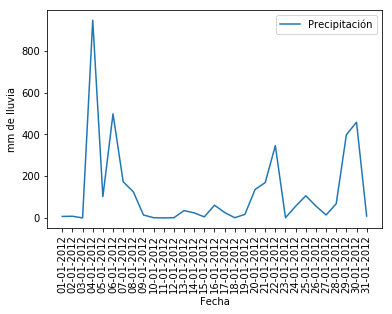

In [13]:

import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(dates, values, label="Precipitación")
plt.ylabel("mm de lluvia")
plt.xlabel("Fecha")
plt.xticks(rotation=90)
plt.legend()